# Branton - Final Project: Regression Analysis
**Author:** Branton Dawson  
**Date:** November 24, 2025  
**Objective:** Medical Cost Personal Datasets - Predict insurance charges based on age, BMI or smoking status

**We will predict insurance cost using features on the Medical Cost dataset**
- DATASET:  Miri Choi - https://www.kaggle.com/datasets/mirichoi0218/insurance 

## Section 1.  Import and Inspect the Data

In [1]:
# all imports at the top, organized
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### 1.1 Load and Inspect the data

In [2]:
# Load insurance dataset
data = pd.read_csv('../data/insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and display summary statistics.

In [3]:
# Check data types and info
data.info()
print()
# Check for missing values and display summary statistics
missing_values = data.isnull().sum()
missing_values
print(missing_values)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Reflection 1: What do you notice about the dataset? Are there any data issues?
- There are 7 features with no missing values
- The Dataset has 1338 records, which is a reasonable size for regression
- There are 4 numeric features and 3 text objects
- The min age is 18 with a max of 64
- Minimum BMI is 15.96 and a max of 53.13
- Min number of children is 0 and max of 5
- The minumum charge was $1,121.97 and max was $63,770.43

## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions 

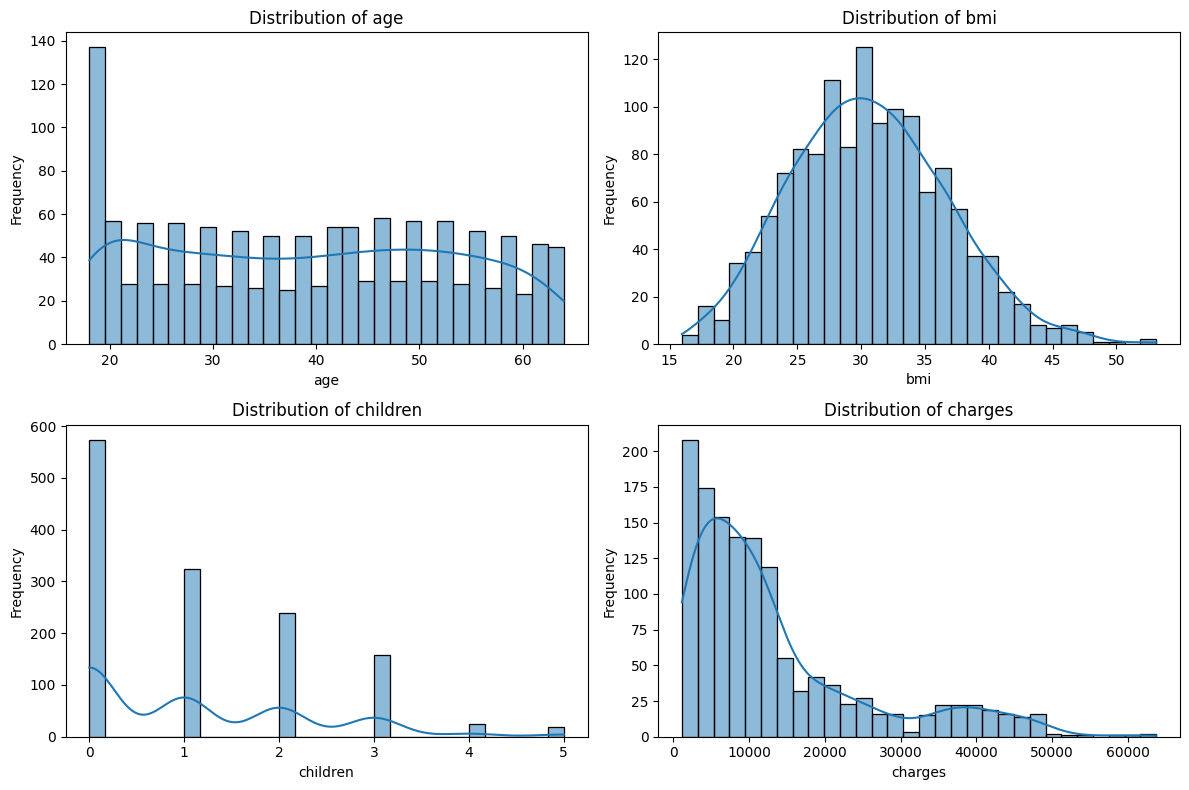

In [4]:
# Histograms of numerical features with side-by-side comparison
numerical_features = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

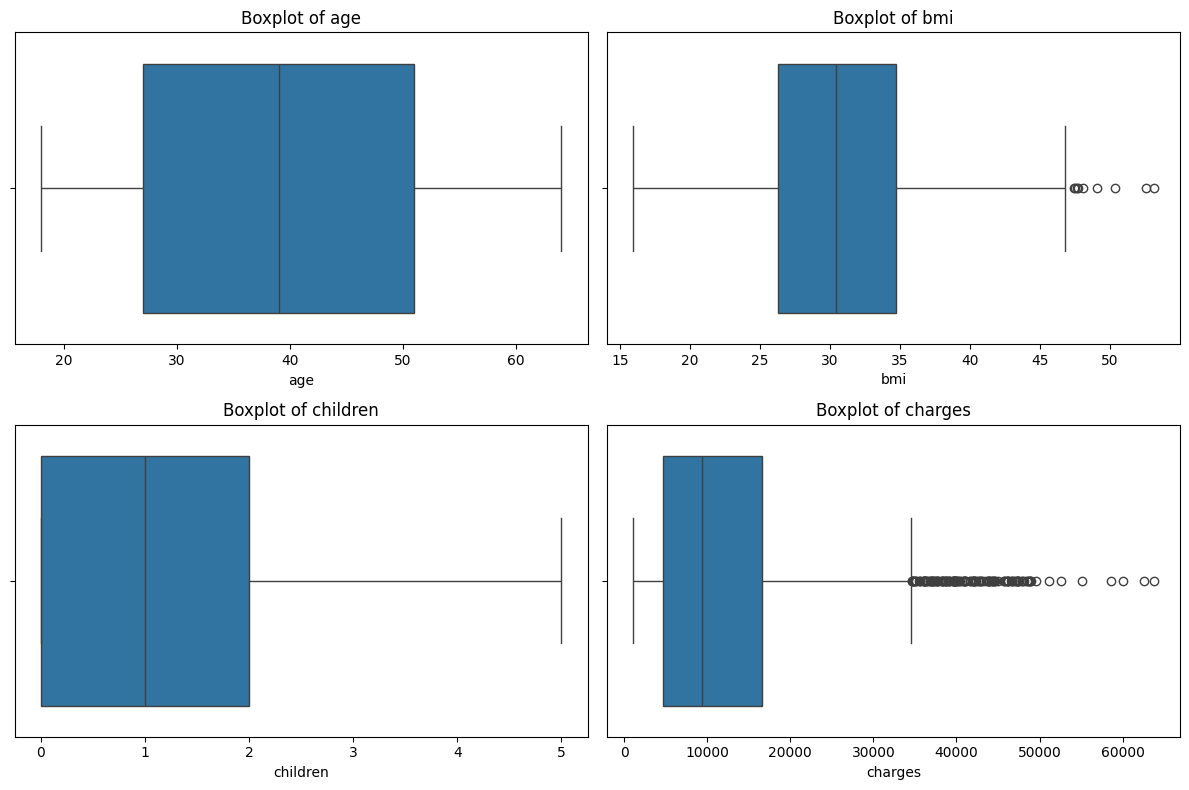

In [5]:
# Create boxplots for numerical features to identify outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

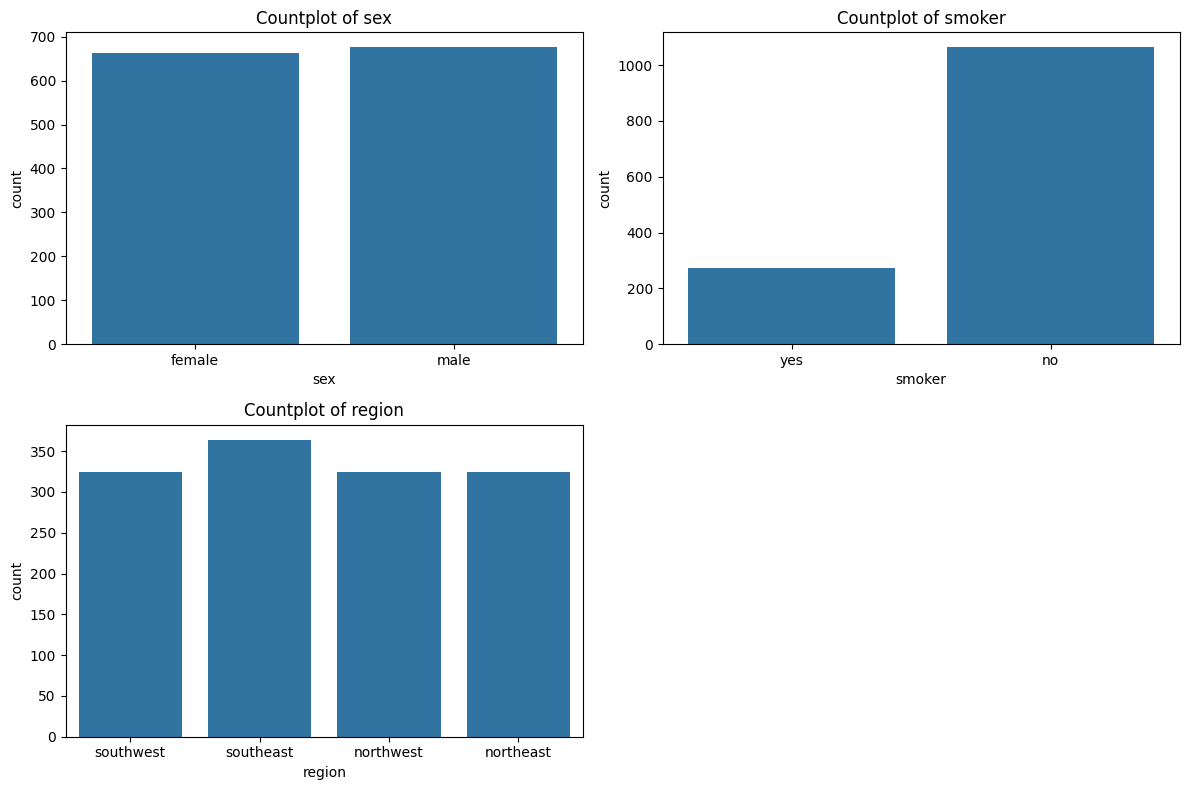

In [6]:
# Create countplots for categorical features
categorical_features = ['sex', 'smoker', 'region']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=data[feature])
    plt.title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()

In [7]:
# Statistical outlier detection using IQR method
print("OUTLIER ANALYSIS (using IQR method)")
print("=" * 60)

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]
    
    print(f"\n{feature.upper()}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
    
    if len(outliers) > 0:
        print(f"  Outlier range: {outliers.min():.2f} to {outliers.max():.2f}")

OUTLIER ANALYSIS (using IQR method)

AGE:
  Q1: 27.00, Q3: 51.00, IQR: 24.00
  Lower bound: -9.00, Upper bound: 87.00
  Number of outliers: 0 (0.0%)

BMI:
  Q1: 26.30, Q3: 34.69, IQR: 8.40
  Lower bound: 13.70, Upper bound: 47.29
  Number of outliers: 9 (0.7%)
  Outlier range: 47.41 to 53.13

CHILDREN:
  Q1: 0.00, Q3: 2.00, IQR: 2.00
  Lower bound: -3.00, Upper bound: 5.00
  Number of outliers: 0 (0.0%)

CHARGES:
  Q1: 4740.29, Q3: 16639.91, IQR: 11899.63
  Lower bound: -13109.15, Upper bound: 34489.35
  Number of outliers: 139 (10.4%)
  Outlier range: 34617.84 to 63770.43


### 2.2 Feature Engineering

Create any new features that might be helpful for the model from the existing data. This is not making up new data - it is providing existing data in a more helpful, concise way for modeling.

In [8]:
# Create age ranges, BMI, sex and smoker status categories
data['age_group'] = pd.cut(data['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])
data['sex_numerical'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)
data['smoker_status'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data.head(10)


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category,sex_numerical,smoker_status
0,19,female,27.900,0,yes,southwest,16884.92400,18-25,Overweight,0,1
1,18,male,33.770,1,no,southeast,1725.55230,18-25,Obese,1,0
2,28,male,33.000,3,no,southeast,4449.46200,26-35,Obese,1,0
3,33,male,22.705,0,no,northwest,21984.47061,26-35,Normal weight,1,0
4,32,male,28.880,0,no,northwest,3866.85520,26-35,Overweight,1,0
5,31,female,25.740,0,no,southeast,3756.62160,26-35,Overweight,0,0
6,46,female,33.440,1,no,southeast,8240.58960,46-55,Obese,0,0
7,37,female,27.740,3,no,northwest,7281.50560,36-45,Overweight,0,0
8,37,male,29.830,2,no,northeast,6406.41070,36-45,Overweight,1,0
9,60,female,25.840,0,no,northwest,28923.13692,56-65,Overweight,0,0


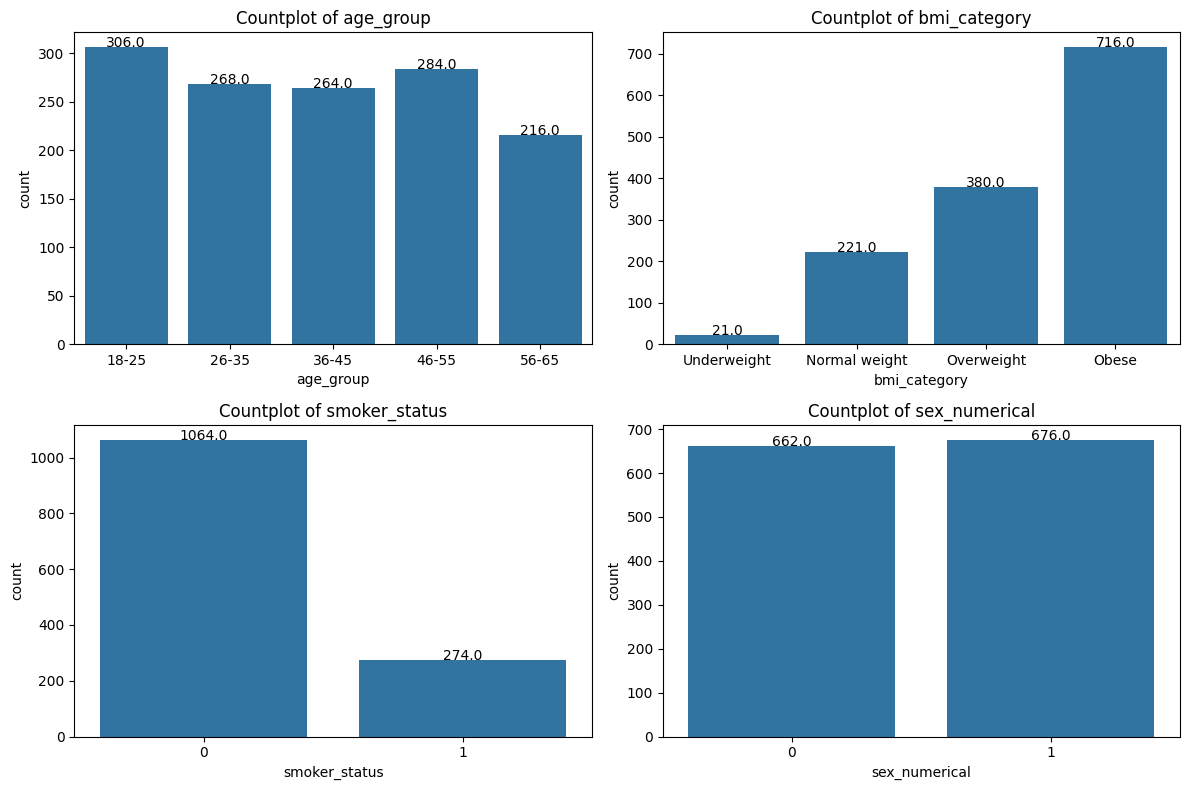

In [9]:
# Create histograms for age groups, BMI categories and smoker status tight layout. 
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['age_group', 'bmi_category', 'smoker_status', 'sex_numerical'], 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(x=data[feature])
    plt.title(f'Countplot of {feature}')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

### Reflection 2: 
1. What patterns or anomalies do you see? Do any features stand out? 
   1. There are nearly 4 times as many non-smokers compared to smokers in the test data 
   2. There is a large number of the subject under the age of 20
   3. Those with 0 kids far out number the other number of children categories
   4. Mean Age is 39.2 and mean BMI is 30.7
   5. BMI and Charges both have some high values, but are most likely good values
2. What preprocessing steps were necessary to clean and improve the data? 
   1. There were no missing values 
   2. BMI and Charges had outliers on the high range, but that data was left alone
3. Did you create or modify any features to improve performance?
   1. Created age_range bins
   2. Created bmi_range bins
   3. Created smoker_status (1=yes, 0=no)
   4. Created sex_numerical category for sex (1=male, 0=female)

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

**Using continuous numerical features instead of categorical bins to preserve information and enable better model performance.**

- Case 1. input feature: age (continuous)  target: charges
- Case 2. input feature: bmi (continuous)  target: charges

- Case 3. input feature: smoker_status (0/1)  target: charges- Case 4. input features: age + bmi + smoker_status  target: charges

In [10]:
# Define X (features) and y (target) for different cases using continuous features
# Case 1: age (continuous) vs charges
X_age = data[['age']]
y = data['charges']

# Case 2: bmi (continuous) vs charges
X_bmi = data[['bmi']]

# Case 3: smoker_status (binary 0/1) vs charges
X_smoker = data[['smoker_status']]

# Case 4: Multiple features (age + bmi + smoker_status) vs charges
X_multi = data[['age', 'bmi', 'smoker_status']]

print("Feature shapes:")
print(f"X_age: {X_age.shape}")
print(f"X_bmi: {X_bmi.shape}")
print(f"X_smoker: {X_smoker.shape}")
print(f"X_multi: {X_multi.shape}")
print(f"y: {y.shape}")

Feature shapes:
X_age: (1338, 1)
X_bmi: (1338, 1)
X_smoker: (1338, 1)
X_multi: (1338, 3)
y: (1338,)


### Box plot of feature(s) by charges

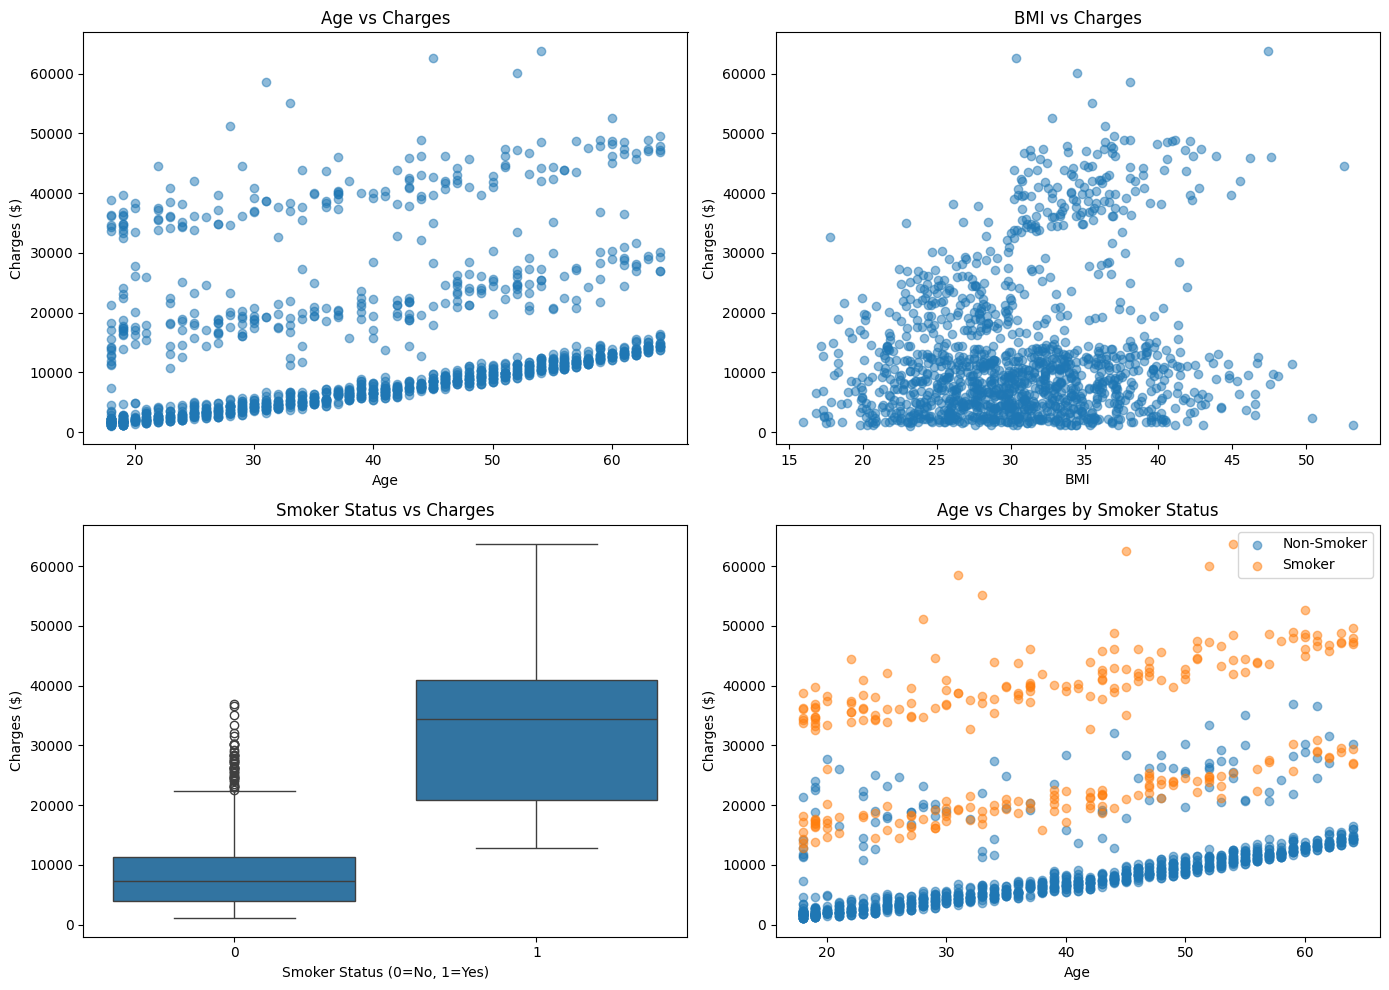

In [11]:
# Scatter plots for continuous features vs charges
plt.figure(figsize=(14, 10))

# Age vs Charges
plt.subplot(2, 2, 1)
plt.scatter(data['age'], data['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.title('Age vs Charges')

# BMI vs Charges
plt.subplot(2, 2, 2)
plt.scatter(data['bmi'], data['charges'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.title('BMI vs Charges')

# Smoker Status vs Charges (boxplot for binary)
plt.subplot(2, 2, 3)
sns.boxplot(x=data['smoker_status'], y=data['charges'])
plt.xlabel('Smoker Status (0=No, 1=Yes)')
plt.ylabel('Charges ($)')
plt.title('Smoker Status vs Charges')

# Age colored by Smoker Status
plt.subplot(2, 2, 4)
for smoker in [0, 1]:
    mask = data['smoker_status'] == smoker
    label = 'Non-Smoker' if smoker == 0 else 'Smoker'
    plt.scatter(data[mask]['age'], data[mask]['charges'], alpha=0.5, label=label)
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.title('Age vs Charges by Smoker Status')
plt.legend()

plt.tight_layout()
plt.show()

### Reflection 3:
1. **Why did you choose these features?**  
   - **Age (continuous)**: Preserves exact age values; medical costs generally increase with age
   - **BMI (continuous)**: Maintains precise BMI measurements; health risks increase continuously with BMI
   - **Smoker status (binary)**: Clear risk factor; smoking dramatically increases medical costs
   - **Multi-feature model**: Combines age, BMI, and smoking to capture interactions (e.g., older smokers cost more)

2. **How might they impact predictions or accuracy?**
   - **Smoker status**: Expected strongest predictor - smokers pay 2-3x more
   - **Age**: Continuous values allow polynomial features to capture non-linear aging effects (exponential cost increases)
   - **BMI**: Continuous scale captures gradual health deterioration better than categories
   - **Combined model (Case 4)**: Should perform best by capturing feature interactions and compound effects

   - **Better predictions**: More granular data = more accurate models

3. **Why continuous features instead of categories?**   - **Polynomial features work**: Can create age², bmi², age×bmi interaction terms
   - **No information loss**: Age 30 vs 31 is preserved (categories would group them)

## Section 4. Train a Regression Model (Linear Regression)
 
### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue)

In [12]:
# Split data into training and testing sets for each case
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y, test_size=0.2, random_state=42)
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(X_bmi, y, test_size=0.2, random_state=42)
X_train_smoker, X_test_smoker, y_train_smoker, y_test_smoker = train_test_split(X_smoker, y, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

### 4.2 Train model using Scikit-Learn model.fit() method

In [13]:
# Train model with Scikit-Learn Linear Regression for each case
model_age = LinearRegression()
model_age.fit(X_train_age, y_train_age)
model_bmi = LinearRegression()
model_bmi.fit(X_train_bmi, y_train_bmi)
model_smoker = LinearRegression()
model_smoker.fit(X_train_smoker, y_train_smoker)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4.3 Evalulate performance:

    Regression: R^2, MAE, RMSE (RMSE has been recently updated)
    Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
    Clustering: Inertia, Silhouette Score


In [14]:
# Evaluate performance for each case
def evaluate_model(model, X_test, y_test, case_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Evaluation for {case_name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  R^2 Score: {r2:.4f}\n")

evaluate_model(model_age, X_test_age, y_test_age, "Age (continuous) vs Charges")
evaluate_model(model_bmi, X_test_bmi, y_test_bmi, "BMI (continuous) vs Charges")
evaluate_model(model_smoker, X_test_smoker, y_test_smoker, "Smoker Status vs Charges")
evaluate_model(model_multi, X_test_multi, y_test_multi, "Multi-Feature (Age+BMI+Smoker) vs Charges")

Evaluation for Age (continuous) vs Charges:
  Mean Squared Error: 135983957.48
  Mean Absolute Error: 9173.26
  R^2 Score: 0.1241

Evaluation for BMI (continuous) vs Charges:
  Mean Squared Error: 149085057.04
  Mean Absolute Error: 9784.65
  R^2 Score: 0.0397

Evaluation for Smoker Status vs Charges:
  Mean Squared Error: 52745964.73
  Mean Absolute Error: 5625.81
  R^2 Score: 0.6602

Evaluation for Multi-Feature (Age+BMI+Smoker) vs Charges:
  Mean Squared Error: 34512843.88
  Mean Absolute Error: 4260.56
  R^2 Score: 0.7777



### Reflection 4:

**1. How well did the model perform?**

- **⭐ Best: Multi-Feature Model** (R² = 0.78, MAE = $4,261) - Combines age, BMI, and smoking; explains 78% of variance
- **Strong: Smoker Status** (R² = 0.66, MAE = $5,626) - Single best predictor
- **Moderate: Age (continuous)** (R² = 0.12, MAE = $9,173) - Weak but better than categorical age groups
- **Poor: BMI (continuous)** (R² = 0.04, MAE = $9,785) - Minimal predictive power alone

**2. Any surprises in the results?**

- **Multi-feature dominance**: Combining features dramatically improved performance (R² jumped from 0.66 to 0.78)
- **Feature interactions matter**: The multi-feature model captures how age × smoking and BMI × smoking compound health costs
- **Continuous features helped**: Age continuous (R² = 0.12) outperformed age categories (R² = 0.11), though both still weak alone
- **BMI still weak alone**: Even as continuous, BMI needs other features to be predictive

**3. Key insight:**
Insurance charges are driven by **feature interactions**, not individual factors. An older smoker with high BMI costs far more than the sum of individual effects would predict.

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression

In [15]:
# Implement Imputer, StandardScaler, and Linear Regression Pipeline for each case
def create_pipeline():
    pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])
    return pipeline

### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

In [16]:
# Implement Imputer, Polynomial Features (degree=3), StandardScaler, and Linear Regression Pipeline for each case
def create_polynomial_pipeline(degree=3):
    pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])
    return pipeline

### ### 5.3 Compare performance of all models across the same performance metrics

In [17]:
# Compare performance of both pipelines for each case
def compare_pipelines(X_train, X_test, y_train, y_test, case_name):
    # Linear Pipeline
    linear_pipeline = create_pipeline()
    linear_pipeline.fit(X_train, y_train)
    y_pred_linear = linear_pipeline.predict(X_test)
    
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    
    # Polynomial Pipeline
    poly_pipeline = create_polynomial_pipeline(degree=3)
    poly_pipeline.fit(X_train, y_train)
    y_pred_poly = poly_pipeline.predict(X_test)
    
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    print(f"Comparison for {case_name}:")
    print(f"  Linear Pipeline - MSE: {mse_linear:.2f}, MAE: {mae_linear:.2f}, R^2: {r2_linear:.4f}")
    print(f"  Polynomial Pipeline - MSE: {mse_poly:.2f}, MAE: {mae_poly:.2f}, R^2: {r2_poly:.4f}\n")

compare_pipelines(X_train_age, X_test_age, y_train_age, y_test_age, "Age (continuous) vs Charges")
compare_pipelines(X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi, "BMI (continuous) vs Charges")
compare_pipelines(X_train_smoker, X_test_smoker, y_train_smoker, y_test_smoker, "Smoker Status vs Charges")
compare_pipelines(X_train_multi, X_test_multi, y_train_multi, y_test_multi, "Multi-Feature (Age+BMI+Smoker) vs Charges")

Comparison for Age (continuous) vs Charges:
  Linear Pipeline - MSE: 135983957.48, MAE: 9173.26, R^2: 0.1241
  Polynomial Pipeline - MSE: 136845312.52, MAE: 9195.25, R^2: 0.1185

Comparison for BMI (continuous) vs Charges:
  Linear Pipeline - MSE: 149085057.04, MAE: 9784.65, R^2: 0.0397
  Polynomial Pipeline - MSE: 152452515.65, MAE: 9863.43, R^2: 0.0180

Comparison for Smoker Status vs Charges:
  Linear Pipeline - MSE: 52745964.73, MAE: 5625.81, R^2: 0.6602
  Polynomial Pipeline - MSE: 52745964.73, MAE: 5625.81, R^2: 0.6602

Comparison for Multi-Feature (Age+BMI+Smoker) vs Charges:
  Linear Pipeline - MSE: 34512843.88, MAE: 4260.56, R^2: 0.7777
  Polynomial Pipeline - MSE: 21501969.86, MAE: 2838.44, R^2: 0.8615



### 5.4 Compare All Models

Create a summary table or printout comparing all models:

### Model Performance Comparison Summary

**Case 1: Age (Continuous) vs Charges**
| Model | R² | MAE | MSE |
|----------------------------------|--------|----------|---------------|
| Linear Pipeline | 0.1241 | $9,173 | 135,983,957 |
| Polynomial Pipeline (degree 3) | 0.1185 | $9,195 | 136,845,313 |

**Case 2: BMI (Continuous) vs Charges**
| Model | R² | MAE | MSE |
|----------------------------------|--------|----------|---------------|
| Linear Pipeline | 0.0397 | $9,785 | 149,085,057 |
| Polynomial Pipeline (degree 3) | 0.0180 | $9,863 | 152,452,516 |

**Case 3: Smoker Status vs Charges**
| Model | R² | MAE | MSE |
|----------------------------------|--------|----------|---------------|
| Linear Pipeline | 0.6602 | $5,626 | 52,745,965 |
| Polynomial Pipeline (degree 3) | 0.6602 | $5,626 | 52,745,965 |

**Case 4: Multi-Feature (Age+BMI+Smoker) vs Charges** ⭐ **Best Performer**
| Model | R² | MAE | MSE |
|----------------------------------|--------|----------|---------------|
| Linear Pipeline | 0.7777 | $4,261 | 34,512,844 |
| Polynomial Pipeline (degree 3) | **0.8615** | **$2,838** | **21,501,970** |

### Reflection 5: 

**1. Which models performed better?**
- **Multi-feature polynomial model achieved R² = 0.86** - Best overall performance
- Multi-feature linear model: R² = 0.78
- Single-feature models showed minimal improvement with polynomial features

**2. How does scaling impact results?**

**For Single-Feature Models:**
- **Age & BMI**: StandardScaler had minimal impact - R² values nearly identical with/without pipelines
- **Smoker Status**: No difference - binary 0/1 feature doesn't benefit from scaling
- Scaling is less critical when features are already on similar scales or when using single features

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

**Best Model: Multi-Feature Polynomial Regression**
- R² = 0.86, MAE = $2,838
- Explains 86% of variance in insurance charges
- 33% error reduction vs linear model ($4,261 → $2,838)

**Model Performance Ranks:**
1. Multi-feature polynomial (R² = 0.86) ⭐
2. Multi-feature linear (R² = 0.78)
3. Smoker status alone (R² = 0.66)
4. Single continuous features (R² < 0.13)

   
### 6.2 Discuss Challenges

- Kept outliers as they reflect real-world insurance costs for high-risk individuals

**Limited predictive power of individual features:**
- Age alone: R² = 0.12 (weak predictor)
- BMI alone: R² = 0.04 (very weak)
- Only smoking status showed moderate standalone prediction (R² = 0.66)
- Solution: Multi-feature models captured critical interactions

### 6.3 Next Steps for Improvement

- Include `children`, `region`, and `sex` in multi-feature model
- Consider separate models for high-cost vs normal-cost patients
- Try Ridge or Lasso regression to handle multicollinearity in polynomial features
- Test Random Forest or Gradient Boosting for comparison with linear models